In [3]:
!pip install pandas numpy matplotlib seaborn psycopg2-binary unidecode

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/08/de/d4448c423484537ebc9373d3da2496a2e47f42ea11ff48e025cf49665471/pandas-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/b6/ab/5b893944b1602a366893559bfb227fdfb3ad7c7629b2a80d039bb5924367/numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/1a/cd3e0c90d1a763ad90073e13b189b4702f11becf4e71dbbad70a7a149811/matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.ma

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import psycopg2
import os

conn = psycopg2.connect(
    host="database_container1000",
    database=os.environ.get('POSTGRES_DB'),
    user=os.environ.get('POSTGRES_USER'),
    password=os.environ.get('POSTGRES_PASSWORD')
)

cursor = conn.cursor()
cursor.execute("SELECT * FROM new_offers")
rows = cursor.fetchall()
for row in rows:
    print(row)

query = "SELECT * FROM new_offers"
df = pd.read_sql_query(query, conn)

(1, 'https://nofluffjobs.com/pl/job/senior-python-data-software-engineer-smartrecruiters-remote-1', 'Senior Python/Data Software Engineer', 'SmartRecruiters Inc.', 'Kraków, Fabryczna 20A', 'Zdalnie', '21\xa0000  – 28\xa0500', '+ VAT (B2B) miesięcznie', "Opis wymagań, Oryginalny tekst., Pokaż tłumaczenie, Experience in back-end development using Python microservices, working with modern RESTful APIs, and designing a persistence layer (Kafka, MongoDB, PostgreSQL), Experience within Data Engineering, Data Warehouse, ETL/ELT areas, Familiarity with Amazon AWS, containerization software (Docker/Kubernetes), and monitoring/analysis tools (Kibana/Grafana/Prometheus), Basic knowledge of Java and Node.js, Good understanding of test automation techniques because our goal is to automate it all, Nice to have: experience in building data pipelines using Kafka/Kafka streams/ksqlDB, Very good level of English (both verbal and written), Sharing of SmartRecruiters's values and willingness to make an im

/tmp/ipykernel_1033/1972631188.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [5]:
df.head()

,id,offer_link,offer_name,company,main_location,other_location,salary,salary_type,main_requirements_description,main_offer_description,...,benefits,company_foundation_year,company_size,company_head_office_place,date_of_scrapping,when_published_relatively,categories,skills_maturity,tags_mandatory,tags_nice_to_have
0,1,https://nofluffjobs.com/pl/job/senior-python-d...,Senior Python/Data Software Engineer,SmartRecruiters Inc.,"Kraków, Fabryczna 20A",Zdalnie,21 000 – 28 500,+ VAT (B2B) miesięcznie,"Opis wymagań, Oryginalny tekst., Pokaż tłumacz...","Opis oferty, Oryginalny tekst., Pokaż tłumacze...",...,"Pakiet sportowy, Prywatna opieka medyczna, Mał...",<None>,<None>,<None>,2023-11-21,Oferta opublikowana dzisiaj,"Backend, Python",Senior,<None>,<None>
1,2,https://nofluffjobs.com/job/senior-python-data...,Senior Python/Data Software Engineer,SmartRecruiters Inc.,"Kraków, Fabryczna 20A",Remote,21 000 – 28 500,+ VAT (B2B) per month,Experience in back-end development using Pytho...,"SmartRecruiters, is building an operating syst...",...,"Sport subscription, Private healthcare, Small ...",2009,480,<None>,2023-11-21,today,"Backend, Python",Senior,"Python, AWS, MongoDB, Docker, Kubernetes, Kafk...","Kibana, Grafana, Prometheus"
2,3,https://nofluffjobs.com/job/ml-python-nlp-engi...,ML (Python + NLP) Engineer,SFox,<None>,Remote,13 104 – 21 840,+ VAT (B2B) per month,"On behalf of our client in Sweden, we’re looki...","What we offer:, Scandinavian work-life balance...",...,"Small teams, International projects",2018,30+,Zug,2023-11-21,This offer expires in 1 day,"AI, Python",Senior,"Python, AI, R&D, Accounting, React, Microservi...",<None>
3,4,https://nofluffjobs.com/job/ml-python-nlp-engi...,ML (Python + NLP) Engineer,SFox,<None>,Remote,13 094 – 21 823,+ VAT (B2B) per month,"On behalf of our client in Sweden, we’re looki...","What we offer:, Scandinavian work-life balance...",...,"Small teams, International projects",2018,30+,Zug,2023-11-21,This offer expires in 1 day,"AI, Python",Senior,"Python, AI, R&D, Accounting, React, Microservi...",<None>
4,5,https://nofluffjobs.com/job/python-test-develo...,Python Test Developer,Sii Polska,Hybrid,<None>,17 000 – 24 000,+ VAT (B2B) per month,At least 3 years of experience as a Python Aut...,We are looking for Candidate who want to join ...,...,"Training budget, Private healthcare, Small teams",2006,8000,<None>,2023-11-21,5 days ago,"Testing, Python",Senior,"Python, API, GitLab, SAFe, Robot Framework","AWS, PostgreSQL, CI/CD, Linux"


In [6]:
import matplotlib.pyplot as plt

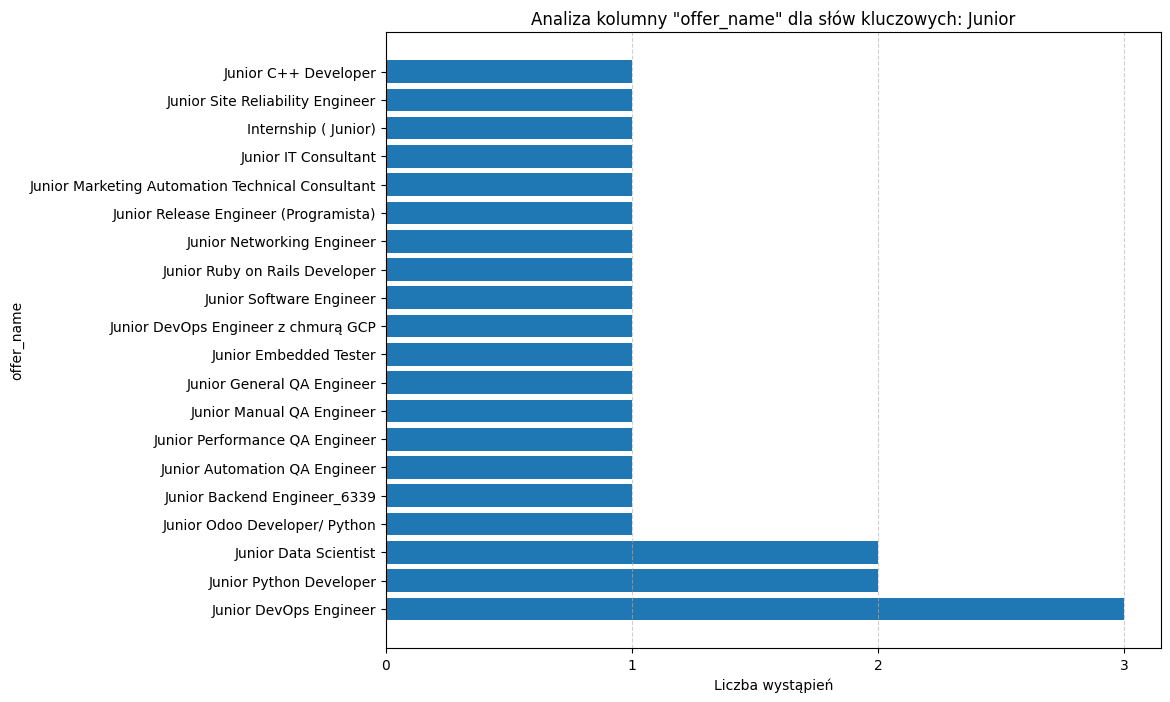

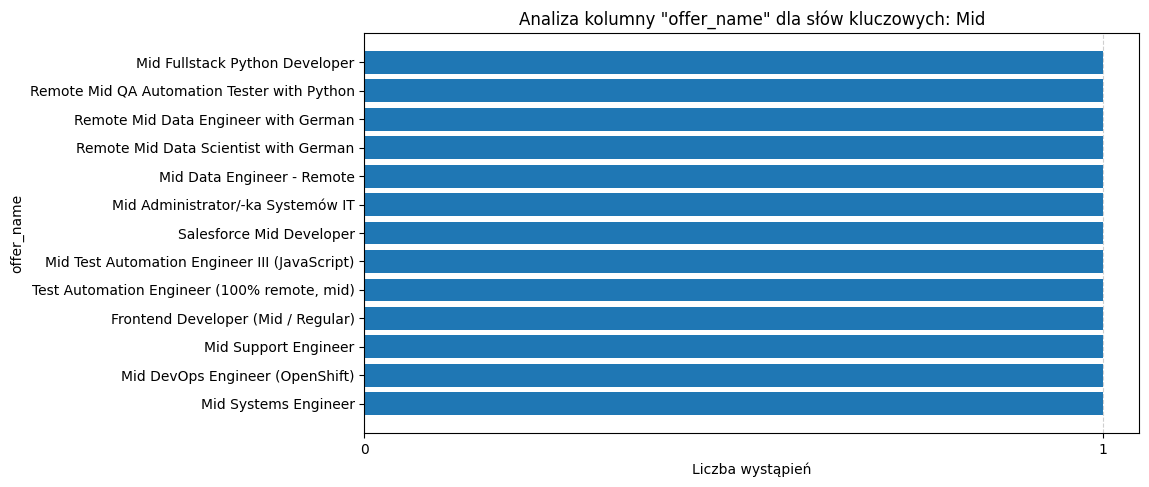

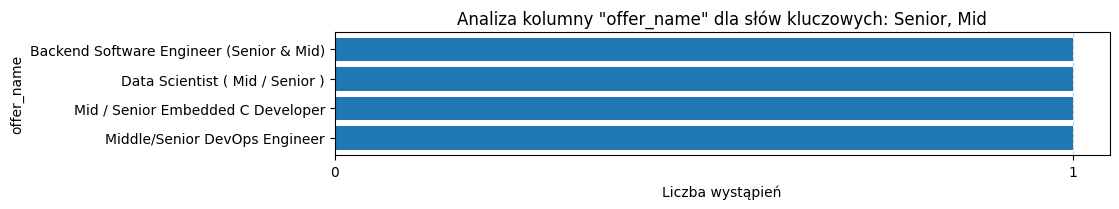

In [7]:


from matplotlib.ticker import MaxNLocator
def analyze_column(dataframe, column_name):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Zliczanie wystąpień unikatowych wartości
    value_counts = dataframe[column_name].value_counts()
    
   # Tworzenie wizualizacji
    plt.figure(figsize=(10, 8))  # Ustawienie rozmiaru wykresu
    ax = plt.gca()  # Pobranie obecnej osi (get current axis)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ustawienie lokalizatora głównych znaczników osi X, aby używał tylko liczb całkowitych
    plt.barh(value_counts.index, value_counts.values)  # Użycie barh dla poziomego wykresu słupkowego
    plt.ylabel(column_name)
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza kolumny "{column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Zmiana osi siatki na 'x'
    plt.show()


from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

def analyze_column_by_keywords(dataframe, column_name, *keywords, **kwargs):
    unwanted_keywords = kwargs.get('unwanted_keywords', [])
    
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Filtruj dane według słów kluczowych
    filtered_df = dataframe.copy()
    for keyword in keywords:
        filtered_df = filtered_df[filtered_df[column_name].str.contains(keyword, case=False, na=False)]
    
    # Wyklucz niepożądane słowa kluczowe
    for unwanted in unwanted_keywords:
        filtered_df = filtered_df[~filtered_df[column_name].str.contains(unwanted, case=False, na=False)]
    
    # Jeśli nie ma żadnych dopasowań, zwróć
    if filtered_df.empty:
        print(f'Brak dopasowań dla słów kluczowych: {", ".join(keywords)}')
        return

    # Zliczanie wystąpień unikatowych wartości
    value_counts = filtered_df[column_name].value_counts()
    
    # Określ liczbę pozycji
    num_items = len(value_counts)

    # Ustal wysokość wykresu
    height_per_item = 0.4
    total_height = num_items * height_per_item

    # Tworzenie wizualizacji
    plt.figure(figsize=(10, total_height))
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.barh(value_counts.index, value_counts.values)
    plt.ylabel(column_name)
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza kolumny "{column_name}" dla słów kluczowych: {", ".join(keywords)}')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

def analyze_other_offers(dataframe, column_name, *unwanted_keywords):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Wyklucz niepożądane słowa kluczowe
    filtered_df = dataframe.copy()
    for unwanted in unwanted_keywords:
        filtered_df = filtered_df[~filtered_df[column_name].str.contains(unwanted, case=False, na=False)]
    
    # Jeśli nie ma żadnych dopasowań, zwróć
    if filtered_df.empty:
        print(f'Brak dopasowań dla kategorii "Inne oferty".')
        return

    # Zliczanie wystąpień unikatowych wartości
    value_counts = filtered_df[column_name].value_counts()
    
    # Określ liczbę pozycji
    num_items = len(value_counts)

    # Ustal wysokość wykresu
    height_per_item = 0.4
    total_height = num_items * height_per_item

    
    # Tworzenie wizualizacji
    plt.figure(figsize=(10, total_height))
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.barh(value_counts.index, value_counts.values)
    plt.ylabel(column_name)
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza kolumny "{column_name}" dla kategorii "Inne oferty"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()


# Wywołanie funkcji
analyze_column_by_keywords(df, 'offer_name', 'Junior', unwanted_keywords=['Mid', 'Senior'])
analyze_column_by_keywords(df, 'offer_name', 'Mid', unwanted_keywords=['Junior', 'Senior'])
#analyze_column_by_keywords(df, 'offer_name', 'Senior', unwanted_keywords=['Junior', 'Mid'])
#analyze_column_by_keywords(df, 'offer_name', 'Junior', 'Mid', unwanted_keywords=['Senior'])
analyze_column_by_keywords(df, 'offer_name', 'Senior', 'Mid', unwanted_keywords=['Junior'])
#analyze_column_by_keywords(df, 'offer_name', 'Junior', 'Mid', 'Senior')

# Wywołanie funkcji dla kategorii "Inne oferty"
#analyze_other_offers(df, 'offer_name', 'Junior', 'Mid', 'Senior')



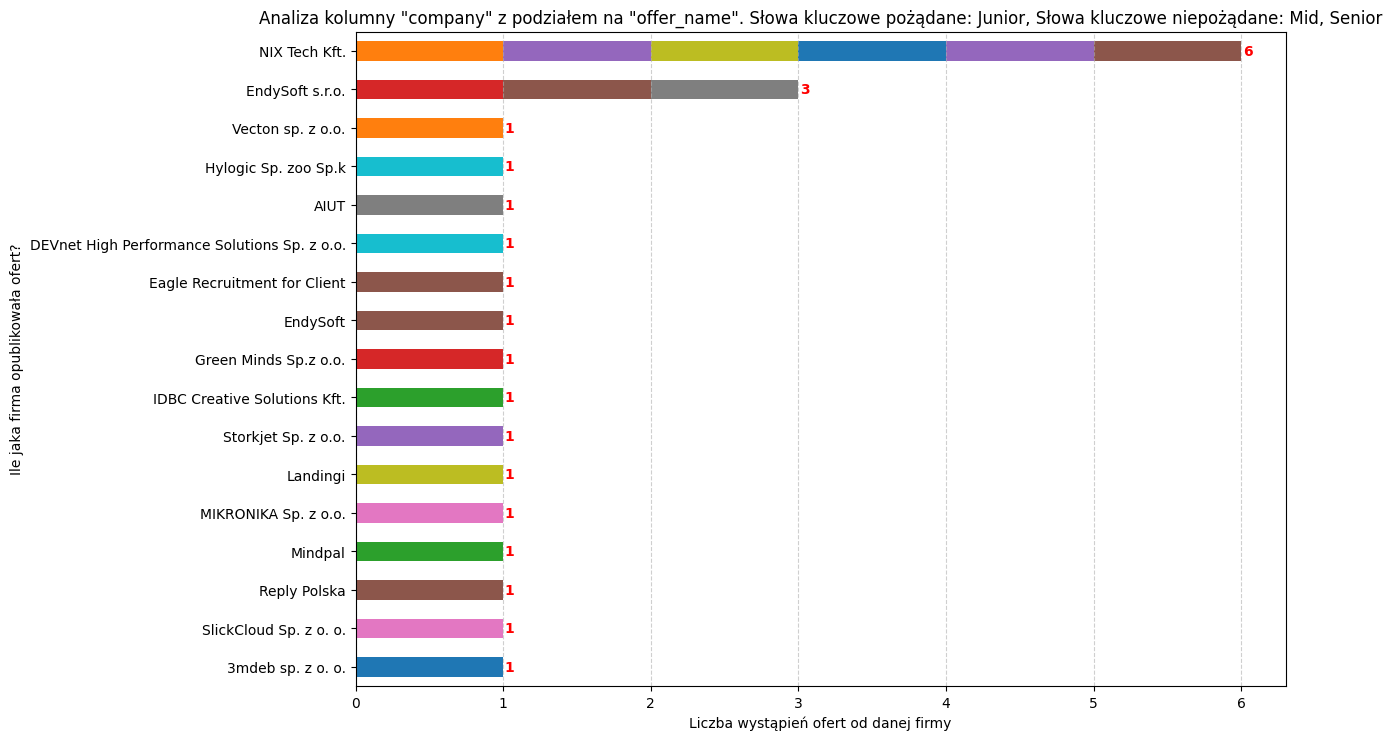

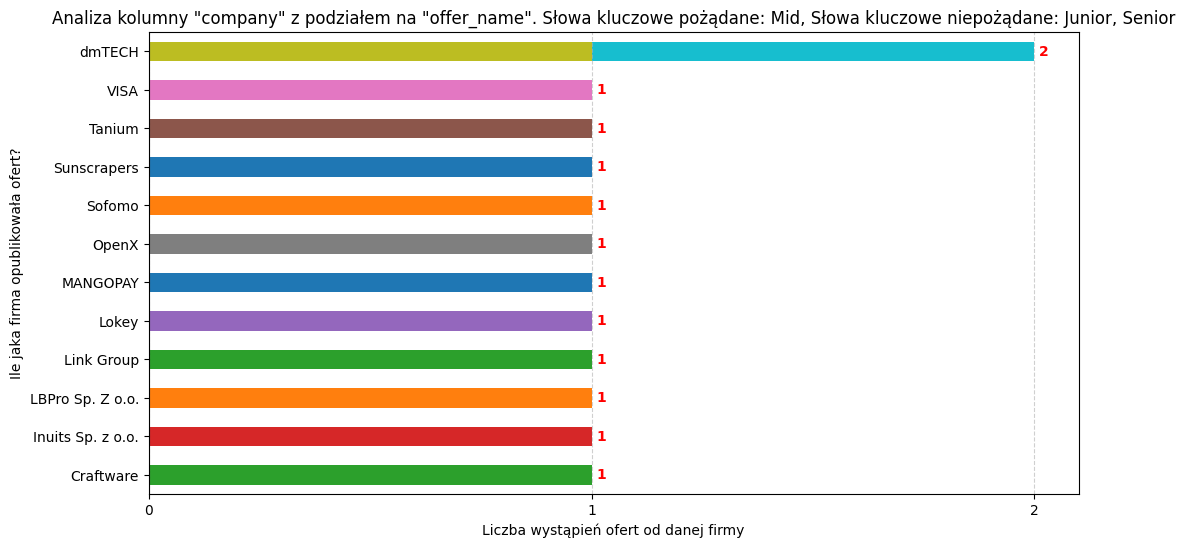

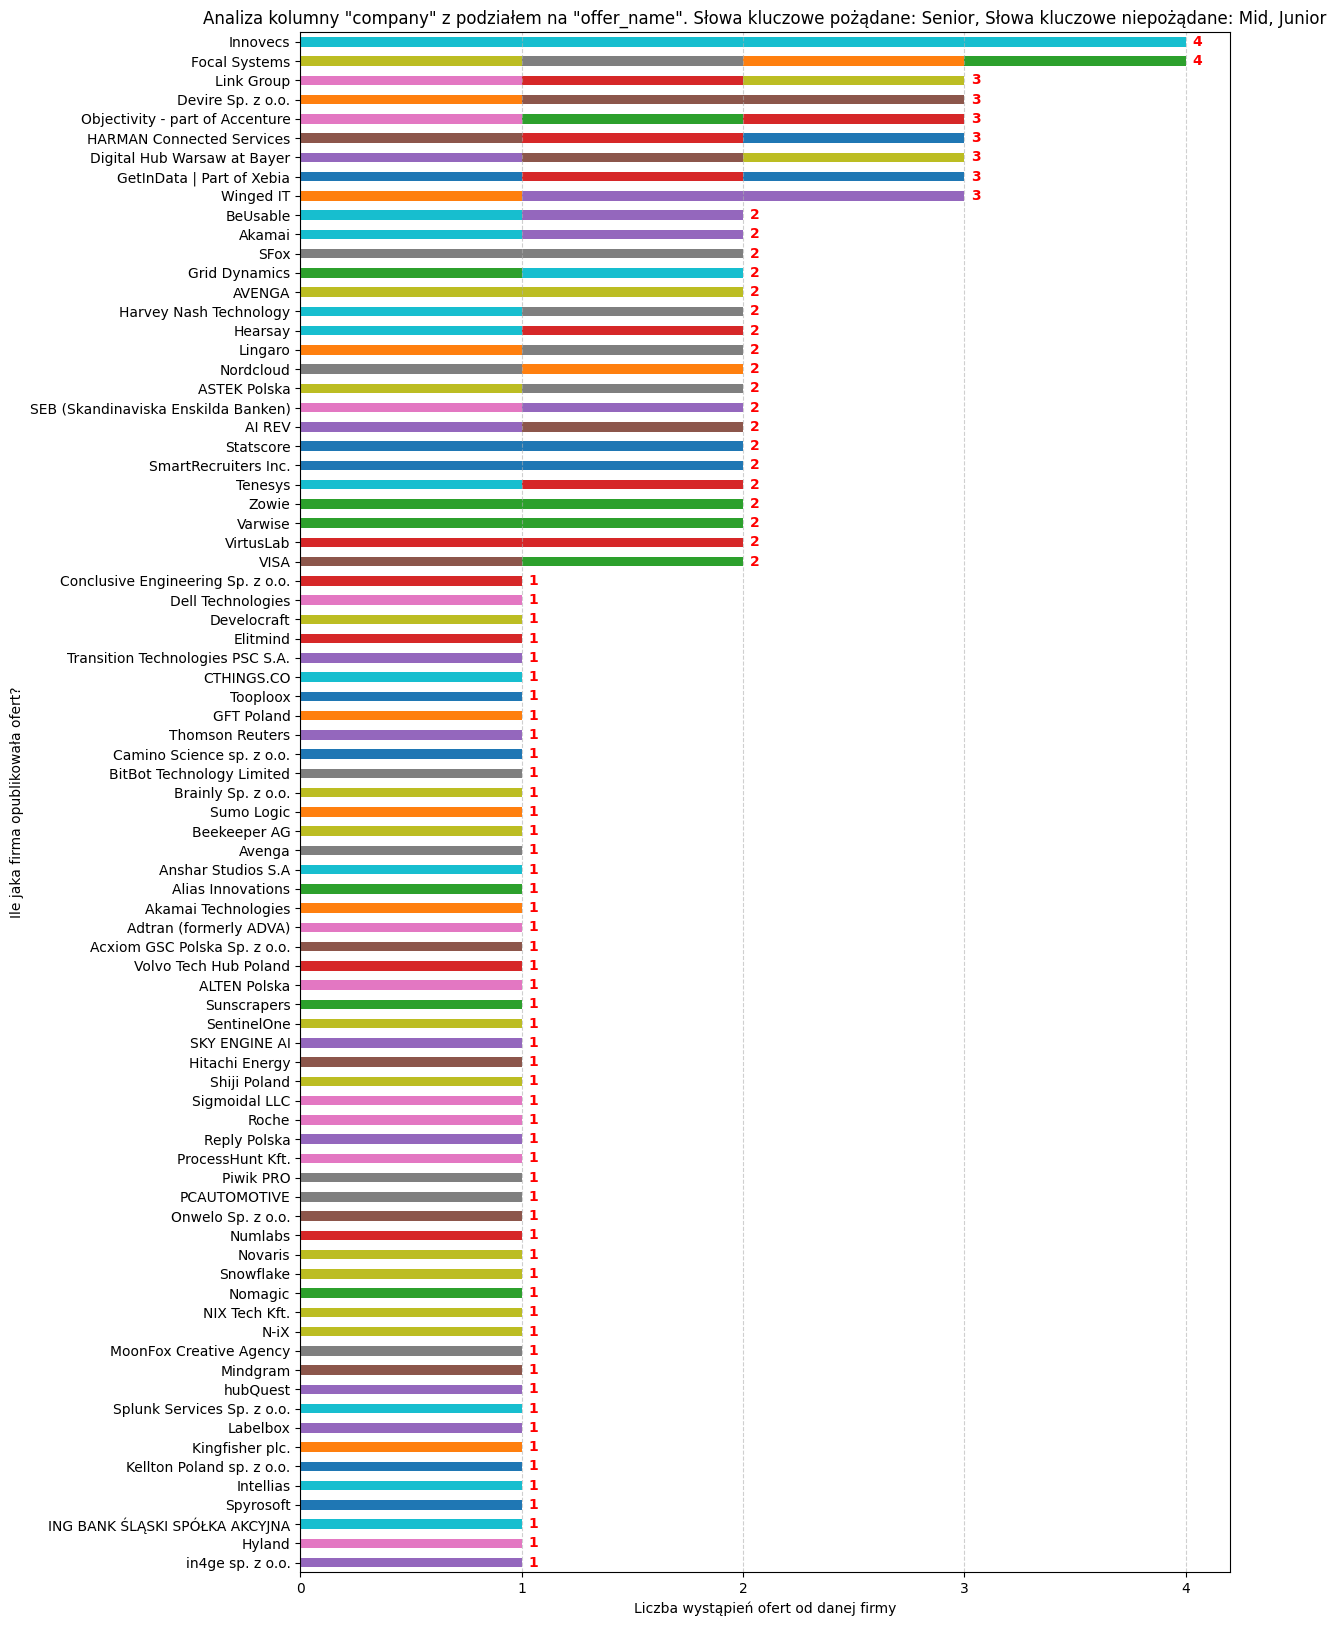

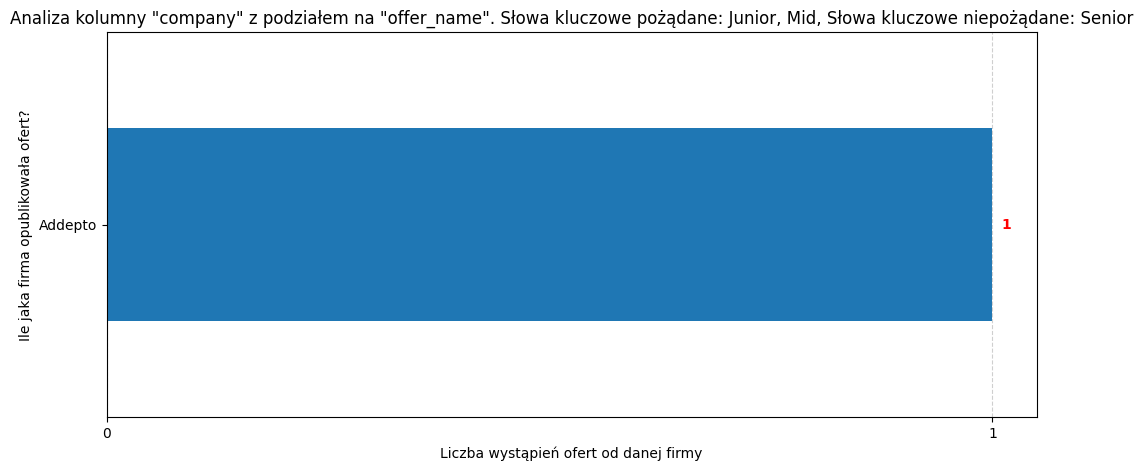

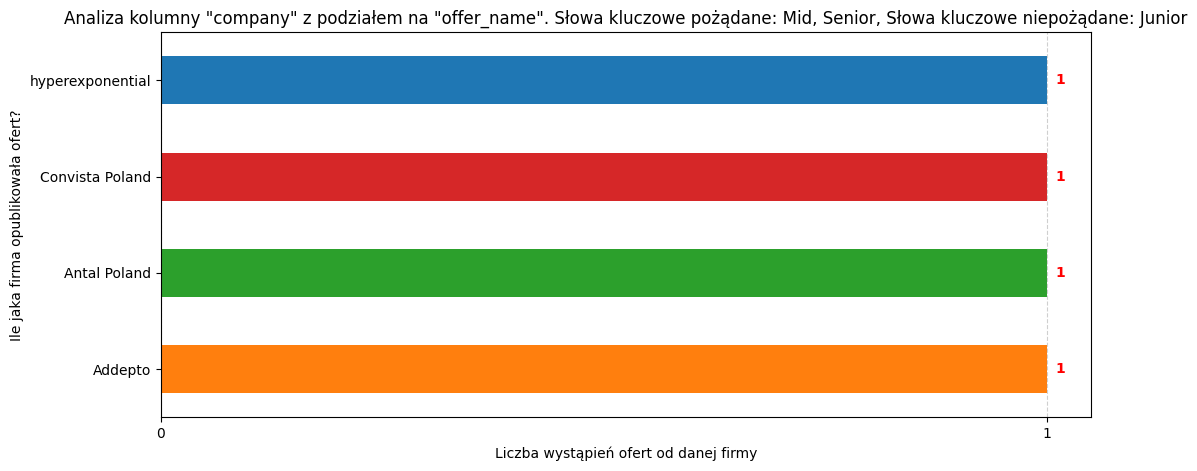

In [8]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

def analyze_column_company_with_offer_names(dataframe, column_name="company", offer_column_name="offer_name", *keywords, **kwargs):
    unwanted_keywords = kwargs.get('unwanted_keywords', [])
    keywords_str = ', '.join(keywords)
    unwanted_keywords_str = ', '.join(unwanted_keywords)
    
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Sprawdź, czy kolumna z nazwami ofert istnieje w ramce danych
    if offer_column_name not in dataframe.columns:
        print(f'Kolumna "{offer_column_name}" nie istnieje w ramce danych.')
        return

    # Filtruj dane według słów kluczowych
    filtered_df = dataframe.copy()
    if keywords:  # Jeśli podano pożądane słowa kluczowe
        for keyword in keywords:
            filtered_df = filtered_df[filtered_df[offer_column_name].str.contains(keyword, case=False, na=False)]
    
    # Wyklucz niepożądane słowa kluczowe
    for unwanted in unwanted_keywords:
        filtered_df = filtered_df[~filtered_df[offer_column_name].str.contains(unwanted, case=False, na=False)]
    
    # Grupowanie danych według kolumny i kolumny z nazwami ofert, a następnie zliczanie wielkości każdej grupy
    grouped_data = filtered_df.groupby([column_name, offer_column_name]).size().unstack(fill_value=0)


    if grouped_data.empty:
        print(f'Brak danych do wyświetlenia dla podanych słów kluczowych pożądanych: {keywords_str}, i niepożądanych: {unwanted_keywords_str}')
        return


    # Obliczenie łącznej liczby ofert dla każdej firmy
    total_offers = grouped_data.sum(axis=1)

    # Sortuj według total_offers
    sorted_index = total_offers.sort_values().index
    grouped_data = grouped_data.reindex(sorted_index)
    total_offers = total_offers.reindex(sorted_index)


    # Określ liczbę pozycji
    num_items = len(total_offers)

    # Ustal wysokość wykresu
    height_per_item = 0.5
    total_height = num_items * height_per_item

    # Ustal minimalną i maksymalną wysokość
    min_height = 5
    max_height = 20

    # Dostosuj wysokość wykresu
    total_height = max(min_height, min(total_height, max_height))
    
    # Tworzenie wizualizacji
    plt.figure(figsize=(12, total_height))
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Rysowanie poziomego wykresu słupkowego z podgrupami
    grouped_data.plot(kind='barh', stacked=True, ax=ax, legend=False)
    
    # Dodanie łącznej liczby ofert jako tekst na wykresie
    for i, total in enumerate(total_offers):
        plt.text(total + grouped_data.max().max() * 0.01, i, str(total), va='center', color='red', fontweight='bold', fontsize=10)
    
    plt.ylabel('Ile jaka firma opublikowała ofert?')
    plt.xlabel('Liczba wystąpień ofert od danej firmy')

    plt.title(f'Analiza kolumny "{column_name}" z podziałem na "{offer_column_name}". Słowa kluczowe pożądane: {keywords_str}, Słowa kluczowe niepożądane: {unwanted_keywords_str}')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.show()

# Przykładowe wywołania funkcji
analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Junior', unwanted_keywords=['Mid', 'Senior'])
analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Mid', unwanted_keywords=['Junior', 'Senior'])
analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Senior', unwanted_keywords=['Mid', 'Junior'])
analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Junior', 'Mid', unwanted_keywords=['Senior'])
analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Mid', 'Senior', unwanted_keywords=['Junior'])
#analyze_column_company_with_offer_names(df, 'company', 'offer_name', 'Junior', 'Mid', 'Senior')
# Przykładowe wywołanie funkcji tylko z niepożądanymi słowami kluczowymi
#analyze_column_company_with_offer_names(df, 'company', 'offer_name', unwanted_keywords=['Junior', 'Mid', 'Senior'])
# Przykładowe wywołanie funkcji bez podawania żadnych słów kluczowych
#analyze_column_company_with_offer_names(df, 'company', 'offer_name')


##RÓŻNE KOLORY I ICH DŁUGOŚĆ NA KOLUMNIE OFERT DANEJ FIRMY ZNACZĄ RODZAJE OFERT I ICH LICZEBNOŚĆ


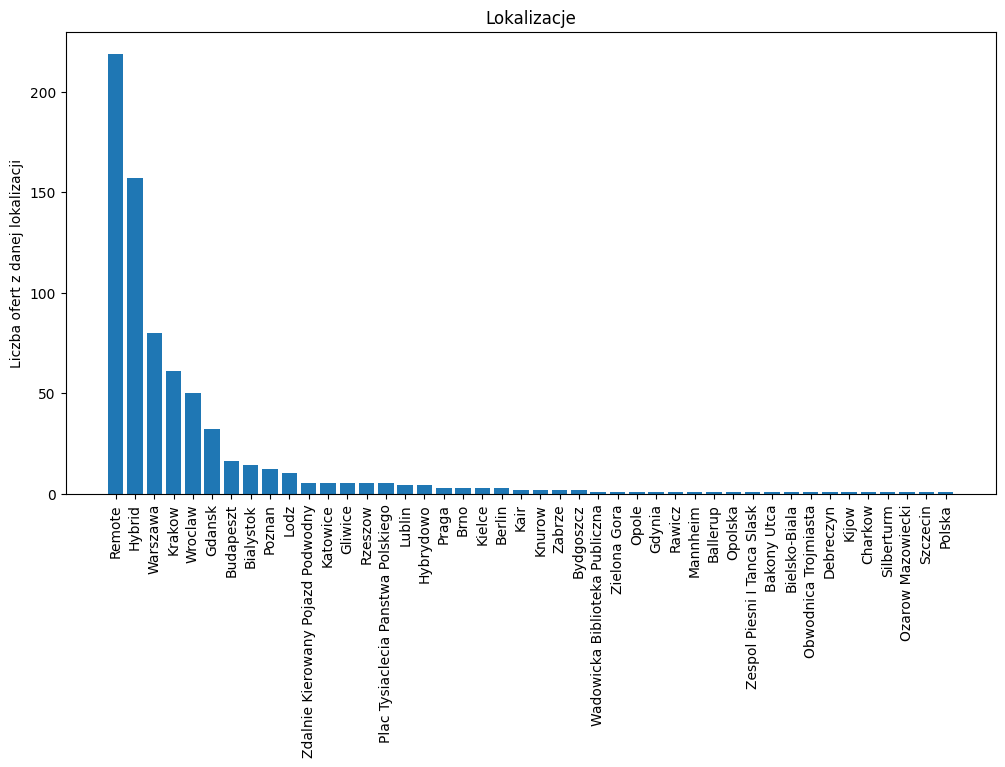

In [9]:
from collections import Counter
import unidecode
import matplotlib.pyplot as plt
import re
import requests

def format_location(loc):
    # Normalizacja myślników i usuwanie dodatkowych spacji
    loc = re.sub(r'\s*-\s*', '-', loc)
    # Usuwanie polskich znaków i formatowanie frazy
    return unidecode.unidecode(loc).title()

def get_polish_name(city_name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "language": "en",
        "format": "json",
        "search": city_name
    }
    response = requests.get(url, params=params)
    results = response.json().get('search')

    if not results:
        return None

    city_id = results[0].get('id')
    if not city_id:
        return None

    url = f"https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbgetentities",
        "ids": city_id,
        "format": "json",
        "props": "labels",
        "languages": "pl"
    }
    response = requests.get(url, params=params)
    data = response.json()

    polish_name = data['entities'][city_id]['labels'].get('pl')
    if polish_name:
        return polish_name.get('value')
    else:
        return None

def process_locations(counter):
    processed_counter = Counter()
    for loc, count in counter.items():
        # Pomijanie "Remote" i "Hybrid"
        if loc.lower() in ["remote", "hybrid"]:
            processed_counter[loc] += count
            continue

        polish_name = get_polish_name(loc)
        if polish_name:
            formatted_polish_name = format_location(polish_name)
            if formatted_polish_name in processed_counter:
                processed_counter[formatted_polish_name] += count
            else:
                processed_counter[formatted_polish_name] = count
        else:
            formatted_loc = format_location(loc)
            processed_counter[formatted_loc] += count

    return processed_counter

def location_joining(df):
    def join_locations(row):
        main_loc = row['main_location']
        other_loc = row['other_location']
        if main_loc == '<None>' and other_loc == '<None>':
            return '<none>'
        elif main_loc == '<None>':
            return other_loc
        elif other_loc == '<None>':
            return main_loc
        else:
            return f"{main_loc}, {other_loc}"

    df['location'] = df.apply(join_locations, axis=1)

    # Tworzenie pierwotnego licznika lokalizacji
    counter = Counter()
    for loc in df['location']:
        for sub_loc in loc.split(", "):
            if not any(char.isdigit() for char in sub_loc):
                counter[sub_loc] += 1

    # Procesowanie i formatowanie licznika
    processed_counter = process_locations(counter)

    # Sortowanie danych w malejącej kolejności
    sorted_data = dict(sorted(processed_counter.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba ofert z danej lokalizacji')
    plt.title('Lokalizacje')
    plt.show()

location_joining(df)


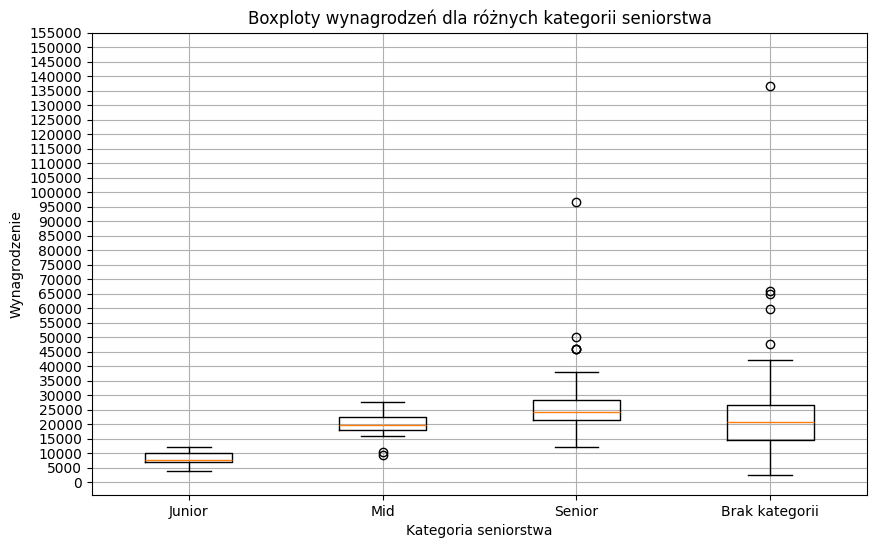

In [10]:

#ZAKOMENTOWANY KOD, KTÓRY W RAZIE CZEGO POKAZUJE PENSJE DLA POSZCZEGÓLNYCH NAZW STANOWISK

# import re
# import matplotlib.pyplot as plt

# def average_salary(df, *keywords, **kwargs):
    
#     unwanted_keywords = kwargs.get('unwanted_keywords', [])
    
#     # Filtruj dane według słów kluczowych
#     filtered_df = df.copy()
#     if keywords:  # Jeśli podano pożądane słowa kluczowe
#         for keyword in keywords:
#             filtered_df = filtered_df[filtered_df['offer_name'].str.contains(keyword, case=False, na=False)]
    
#     # Wyklucz niepożądane słowa kluczowe
#     for unwanted in unwanted_keywords:
#         filtered_df = filtered_df[~filtered_df['offer_name'].str.contains(unwanted, case=False, na=False)]

#     # Jeśli po filtracji nie ma żadnych danych, wyświetl komunikat
#     if filtered_df.empty:
#         print(f"Nie znaleziono żadnych ofert dla słów pożądanych: {', '.join(keywords)} i niepożądanych: {', '.join(unwanted_keywords)}")
#         return

#     sum_variables_lower = {}
#     sum_variables_upper = {}
#     number_in_variables_type = {}

#     for index, row in filtered_df.iterrows():
#         # Usuwanie niecyfrowych znaków i podział wartości salary
#         salary_values = row['salary'].split("–")
#         salary_range = [re.sub(r'\D', '', x) for x in salary_values]

#         # Tworzenie nazw zmiennych
#         var_name = f"{row['offer_name']} [{row['salary_type']}]"
#         lower_var_name = f"dolne_widelki_{row['offer_name']} [{row['salary_type']}]"
#         upper_var_name = f"gorne_widelki_{row['offer_name']} [{row['salary_type']}]"
#         no_range_var_name = f"srednia_bez_widelek_{row['offer_name']} [{row['salary_type']}]"

#         if len(salary_range) > 1:
#             # Sumowanie wartości do odpowiednich zmiennych (jeśli mamy widełki płacowe), oraz liczymy liczbę wystąpień danego typu wynagrodzeń
#             sum_variables_lower[var_name] = sum_variables_lower.get(lower_var_name, 0) + int(salary_range[0])
#             number_in_variables_type[var_name] = number_in_variables_type.get(lower_var_name, 0) + 1

#             sum_variables_upper[var_name] = sum_variables_upper.get(upper_var_name, 0) + int(salary_range[1])            
#         else:
#             # Dodawanie wartości do zmiennej dla ofert bez widełek płacowych
#             sum_variables_lower[no_range_var_name] = sum_variables_lower.get(no_range_var_name, 0) + int(salary_range[0])
#             sum_variables_upper[no_range_var_name] = sum_variables_upper.get(no_range_var_name, 0) + int(salary_range[0])
#             number_in_variables_type[no_range_var_name] = number_in_variables_type.get(no_range_var_name, 0) + 1

#     # Wyliczanie średniej wartości parametrów, na bazie dwóch słowników
#     def divide_dict_values(dict_X, dict_Y):
#         """
#         Dzieli wartości słownika dict_X przez wartości słownika dict_Y 
#         dla każdego klucza i zwraca nowy słownik z wynikami.

#         :param dict_X: Słownik z dzielnikami
#         :param dict_Y: Słownik z dzielnymi
#         :return: Słownik z wynikami dzielenia
#         """
#         if set(dict_X.keys()) != set(dict_Y.keys()):
#             raise ValueError("Słowniki mają różne zbiory kluczy")

#         result_dict = {}
#         for key in dict_X.keys():
#             if dict_Y[key] == 0:
#                 raise ValueError(f"Wartość dla klucza '{key}' w słowniku dict_Y jest równa zero, dzielenie niemożliwe")
#             result_dict[key] = dict_X[key] / dict_Y[key]

#         return result_dict

#     average_values_lower = divide_dict_values(sum_variables_lower, number_in_variables_type)
#     average_values_upper = divide_dict_values(sum_variables_upper, number_in_variables_type)

#     # Tworzenie wykresu
#     preKeys = list(average_values_lower.keys())
#     values_lower = list(average_values_lower.values())
#     values_upper = list(average_values_upper.values())

#     keys = sorted(preKeys, key=lambda x: x[::-1], reverse=True)

#     def sorting_key(key):
#         # Określ pozycję klucza na wykresie w oparciu o wyrażenia
#         if "[+ VAT (B2B) per month]" in key:
#             position1 = 0
#         elif "[gross per month (employment)]" in key:
#             position1 = 1
#         else:
#             position1 = 2
    
#         # Określ pozycję klucza w oparciu o słowa "Junior", "Senior" itp.
#         if "Junior" in key:
#             position2 = 0
#         elif "Senior" in key:
#             position2 = 2
#         else:
#             position2 = 1
    
#         return (position1, position2)

#     # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
#     sorted_keys = sorted(keys, key=sorting_key)
    
#     # Posortuj klucze słownika keys używając zdefiniowanej funkcji klucza
#     keys = sorted(keys, key=sorting_key)
    
#     # Dostosuj wysokość wykresu do liczby kolumn/zakresów do wyświetlenia
#     fig, ax = plt.subplots(figsize=(10, len(keys)*0.5))
        
#     i = 0
#     while i < len(keys):
#         if "srednia_bez_widelek" in keys[i]:
#             label = keys[i].replace("srednia_bez_widelek_", "Średnia, gdy bez widełek płacowych: ")            
#             ax.hlines(label, values_lower[i] - 90, values_lower[i] + 90, colors='red', linestyles='solid')
#             i += 1
#         else:
#             label = keys[i]
#             ax.hlines(label, values_lower[i], values_upper[i], colors='blue', linestyles='solid')
#             i += 1

#     ax.set_xlabel('Wynagrodzenie')
#     ax.set_ylabel('Nazwa stanowiska i typ pensji')
#     ax.set_title(f'Zakresy wynagrodzeń dla słów pożądanych: {", ".join(keywords)} i niepożądanych: {", ".join(unwanted_keywords)}')
#     ax.grid(axis='x')
#     plt.tight_layout()
#     plt.show()

# # Test funkcji
# average_salary(df, 'Junior', unwanted_keywords=['Mid', 'Senior'])
# average_salary(df, 'Mid', unwanted_keywords=['Junior', 'Senior'])
# average_salary(df, 'Senior', unwanted_keywords=['Mid', 'Junior'])
# average_salary(df, 'Junior', 'Mid', unwanted_keywords=['Senior'])
# average_salary(df, 'Mid', 'Senior', unwanted_keywords=['Junior'])
# average_salary(df, 'Junior', 'Mid', 'Senior')
# average_salary(df, unwanted_keywords=['Junior', 'Mid', 'Senior'])
# average_salary(df)


import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def average_salary(df, **kwargs):
    unwanted_keywords = kwargs.get('unwanted_keywords', [])

    # Filtruj dane według słów kluczowych
    filtered_df = df.copy()

    # Wyklucz niepożądane słowa kluczowe
    for unwanted in unwanted_keywords:
        filtered_df = filtered_df[~filtered_df['offer_name'].str.contains(unwanted, case=False, na=False)]

    # Jeśli po filtracji nie ma żadnych danych, wyświetl komunikat
    if filtered_df.empty:
        print(f"Nie znaleziono żadnych ofert dla niepożądanych słów kluczowych: {', '.join(unwanted_keywords)}")
        return

    # Tworzenie kategorii seniorstwa
    senior_categories = ['Junior', 'Mid', 'Senior', 'Brak kategorii']

    # Inicjalizacja słowników do przechowywania danych o wynagrodzeniach
    salary_data = {category: [] for category in senior_categories}

    for index, row in filtered_df.iterrows():
        # Usuwanie niecyfrowych znaków i podział wartości salary
        salary_values = row['salary'].split("–")
        salary_range = [re.sub(r'\D', '', x) for x in salary_values]

        if len(salary_range) > 1:
            average_salary = (int(salary_range[0]) + int(salary_range[1])) / 2
        else:
            average_salary = int(salary_range[0])

        # Określanie kategorii seniorstwa
        if 'Junior' in row['offer_name']:
            category = 'Junior'
        elif 'Mid' in row['offer_name']:
            category = 'Mid'
        elif 'Senior' in row['offer_name']:
            category = 'Senior'
        else:
            category = 'Brak kategorii'

        # Dodawanie wynagrodzenia do odpowiedniej kategorii
        salary_data[category].append(average_salary)

    # Tworzenie wykresu boxplot
    boxplot_data = [salary_data[category] for category in senior_categories]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(boxplot_data, labels=senior_categories)
    
    # Dostosuj oznaczenia i skoki na osi Y
    ax.set_yticks(np.arange(0, max(ax.get_yticks()), 5000))
    
    ax.set_xlabel('Kategoria seniorstwa')
    ax.set_ylabel('Wynagrodzenie')
    ax.set_title(f'Boxploty wynagrodzeń dla różnych kategorii seniorstwa')
    plt.grid(True)
    plt.show()

# Test funkcji
average_salary(df)



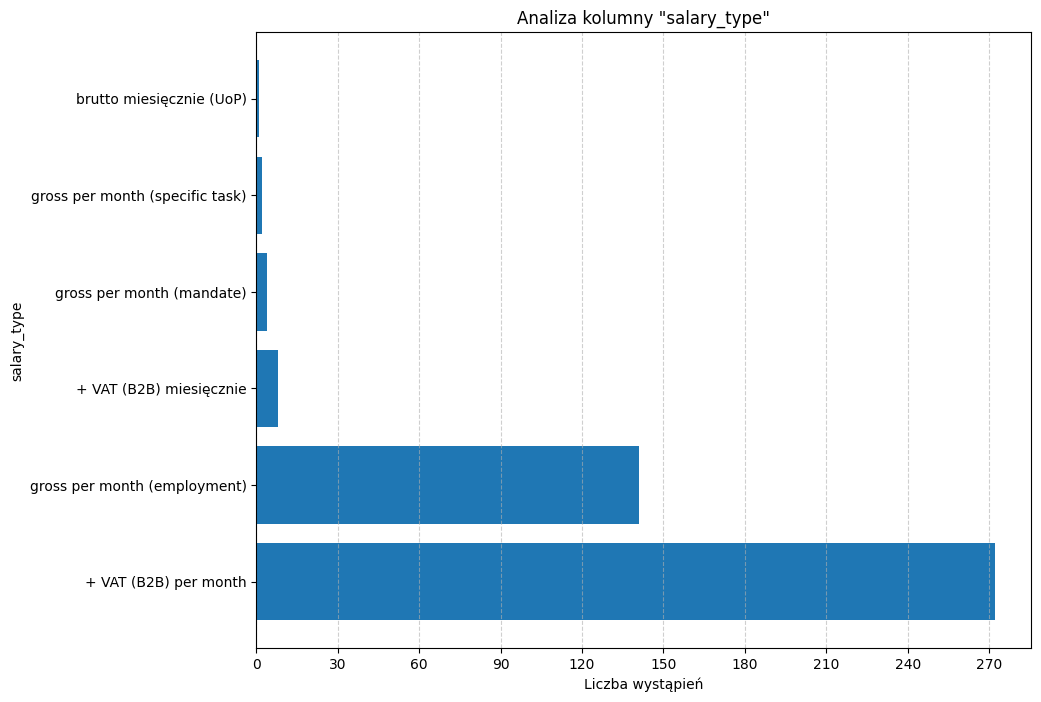

In [11]:
analyze_column(df, 'salary_type')

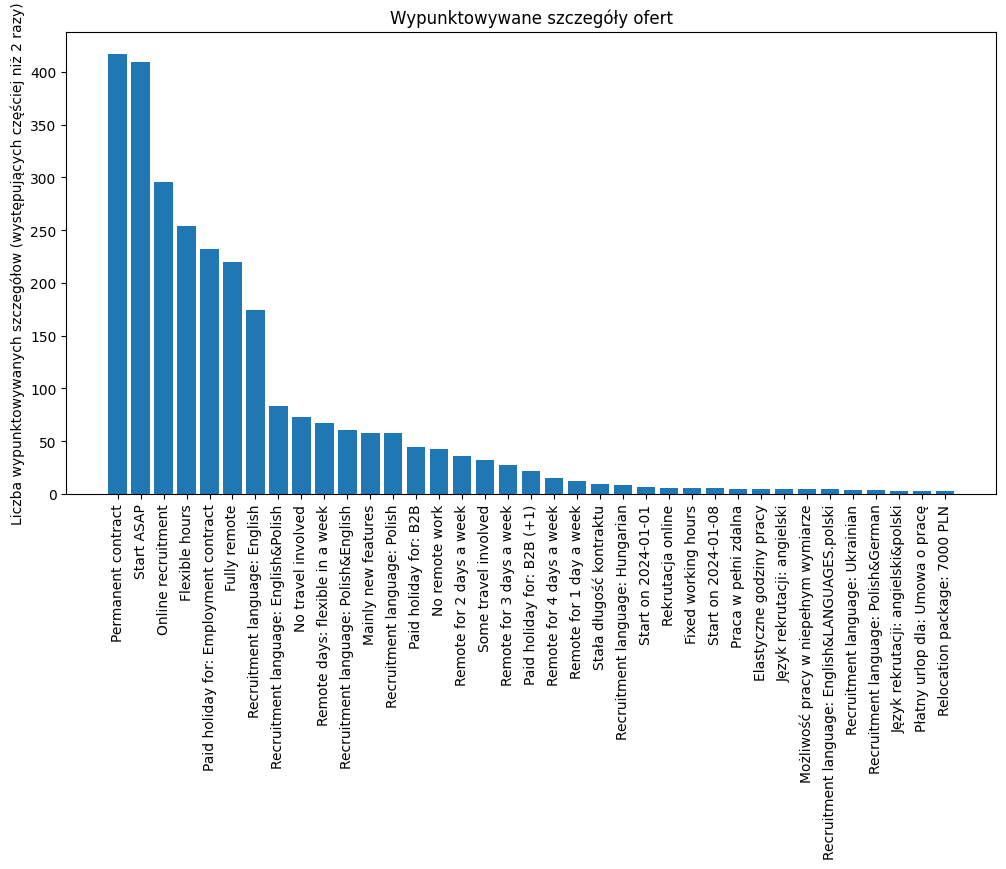

In [12]:
    def offer_details_counter(df):
        counter = Counter()
        
        for loc in df['offer_details']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Filtruj tagi, które wystąpiły mniej niż 3 razy
        filtered_data = {k: v for k, v in counter.items() if v >= 3}

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba wypunktowywanych szczegółow (występujących częściej niż 2 razy)')
        plt.title('Wypunktowywane szczegóły ofert')
        plt.show()

offer_details_counter(df)

/tmp/ipykernel_1033/2136381327.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(new_labels)


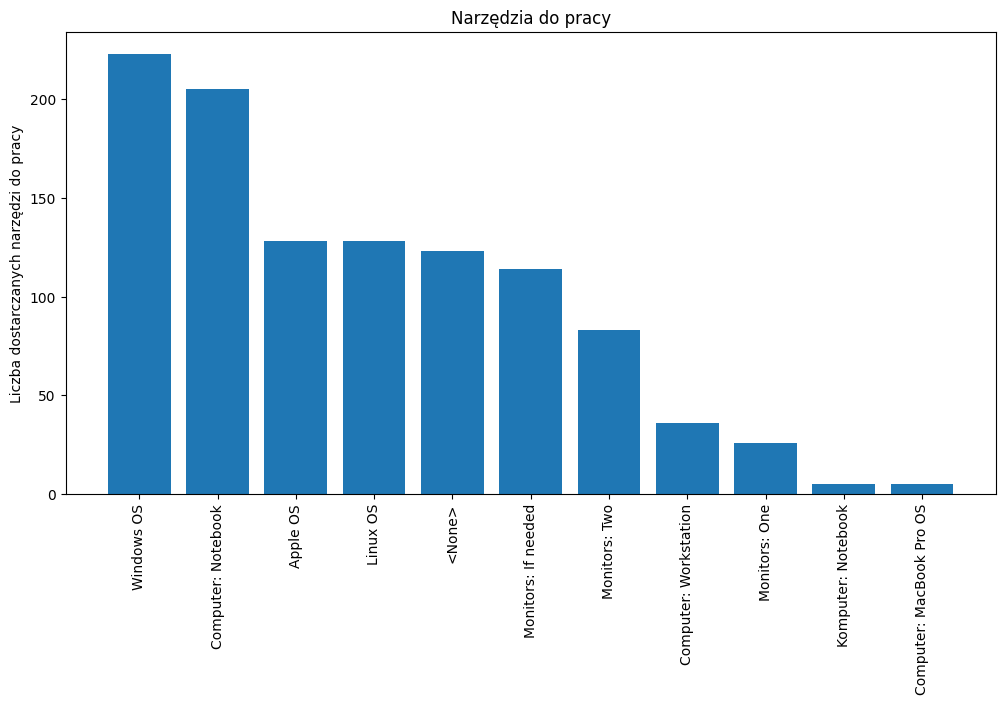

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def eq_supplied_counter(df):
    counter = Counter()
    
    for loc in df['equipment_supplied']:
        for sub_loc in loc.split(", "):
            counter[sub_loc] += 1

    # Filtruj tagi, które wystąpiły mniej niż 5 razy
    filtered_data = {k: v for k, v in counter.items() if v >= 5}

    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
    
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba dostarczanych narzędzi do pracy')
    plt.title('Narzędzia do pracy')
    
    # Aktualizacja etykiet na osi X
    new_labels = []
    for label in plt.gca().get_xticklabels():
        for keyword in ["Windows", "Linux", "Mac", "Apple"]:
            if keyword.lower() in label.get_text().lower():
                new_labels.append(label.get_text() + " OS")
                break
        else:
            new_labels.append(label.get_text())

    plt.gca().set_xticklabels(new_labels)

    plt.show()

# Przykład użycia
eq_supplied_counter(df)



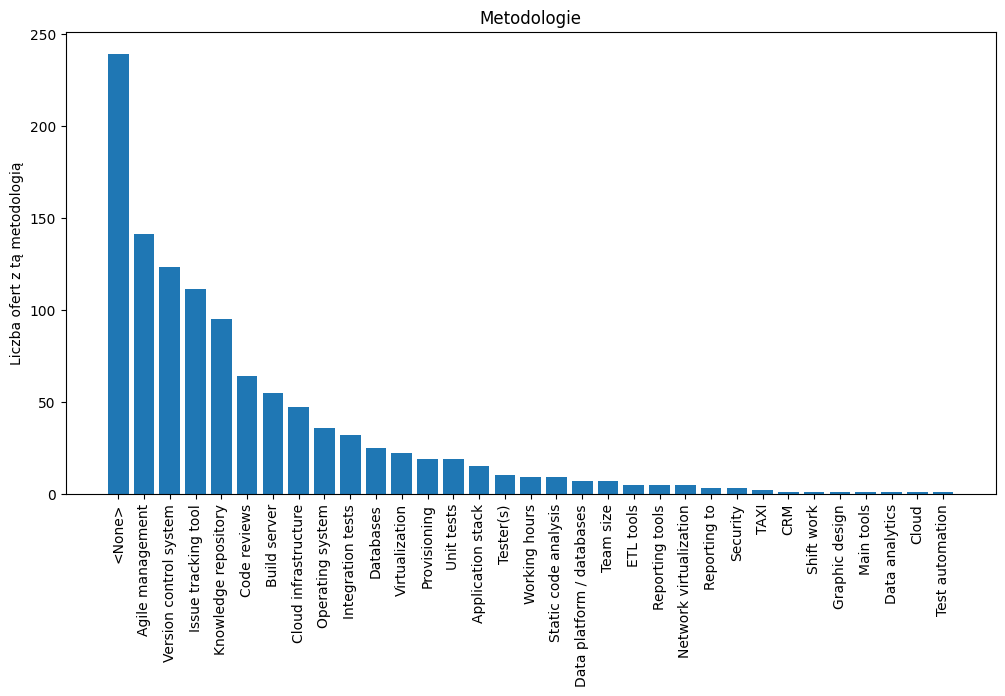

In [14]:
    def methodology_ctr(df):
        counter = Counter()
        
        for loc in df['methodology']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(counter.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba ofert z tą metodologią')
        plt.title('Metodologie')
        plt.show()

methodology_ctr(df)

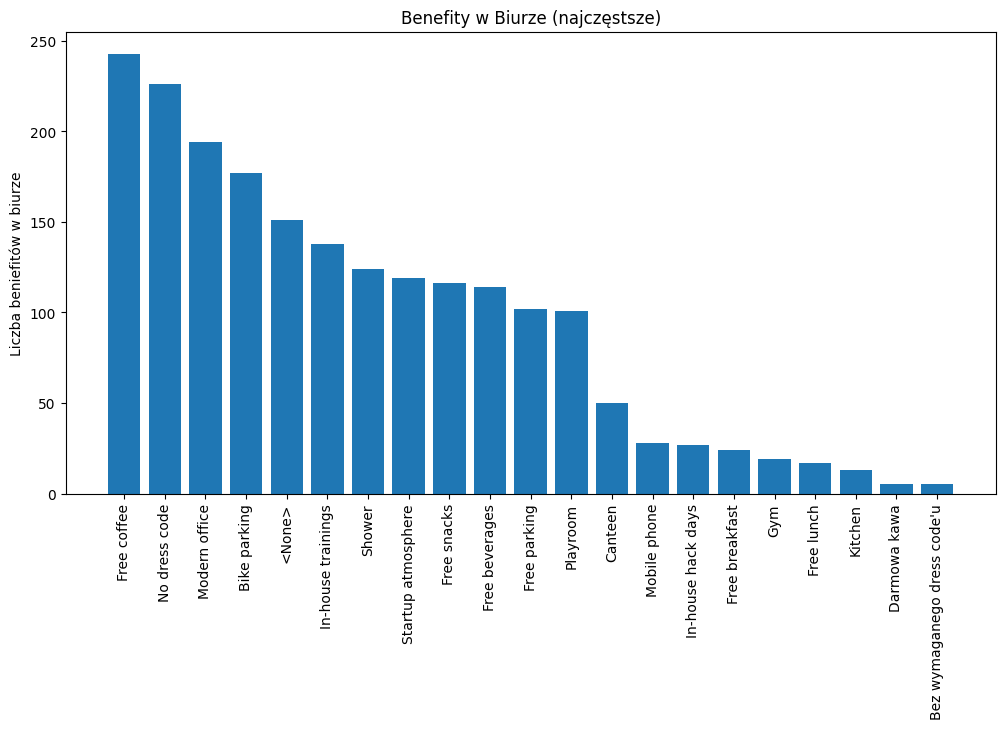

In [15]:

    def perks_ctr(df):
        counter = Counter()
        
        for loc in df['perks_in_the_office']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1


        # Filtruj tagi, które wystąpiły mniej niż 5 razy
        filtered_data = {k: v for k, v in counter.items() if v >= 5}

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
        
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba beniefitów w biurze')
        plt.title('Benefity w Biurze (najczęstsze)')
        plt.show()

perks_ctr(df)

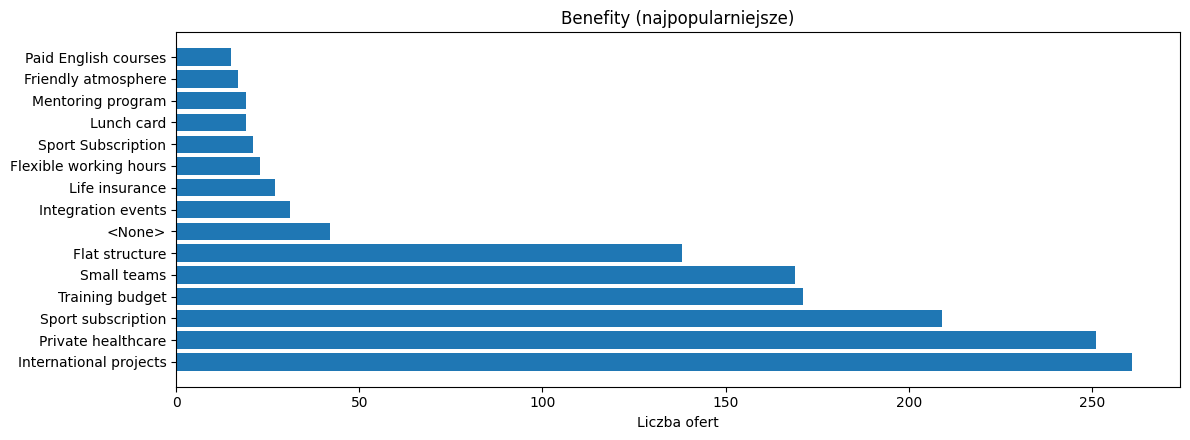

In [16]:
def benefits_ctr(df):
    counter = Counter()
    
    for loc in df['benefits']:
        for sub_loc in loc.split(", "):
            counter[sub_loc] += 1

    # Filtruj tagi, które wystąpiły mniej niż 5 razy
    filtered_data = {k: v for k, v in counter.items() if v >= 15}

    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
    
    # Oblicz wysokość wykresu proporcjonalnie do liczby kolumn
    height = len(sorted_data) * 0.3  # 0.3 to przykładowa wartość dla każdej kolumny, możesz ją dostosować
    plt.figure(figsize=(12, height))
    
    # Tworzenie wykresu
    plt.barh(list(sorted_data.keys()), list(sorted_data.values()))
    plt.xlabel('Liczba ofert')
    plt.title('Benefity (najpopularniejsze)')
    plt.tight_layout()  # Aby poprawić wygląd wykresu
    plt.show()

# Możesz teraz użyć funkcji benefits_ctr, przekazując jej df jako argument
benefits_ctr(df)


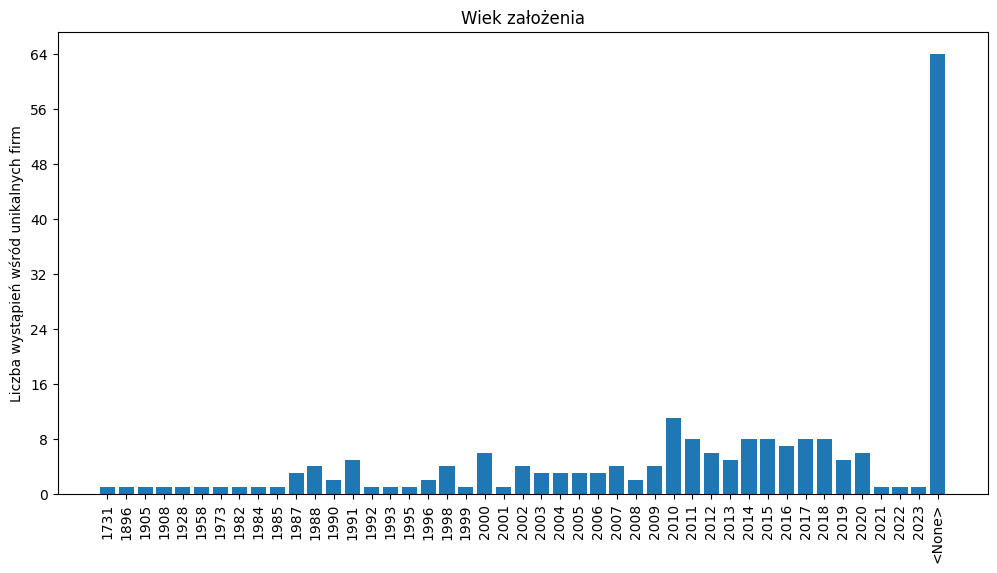

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

def unique_company_age_ctr(df):
    counter = Counter()
    once_mentioned = set()
    
    for index, row in df.iterrows():
        company = row['company']
        founded_in = row['company_foundation_year']
        
        if company not in once_mentioned:
            counter[founded_in] += 1
            once_mentioned.add(company)

    # Podziel klucze na te, które są czterocyfrowymi liczbami, i na pozostałe
    numeric_keys = [key for key in counter.keys() if isinstance(key, str) and key.isdigit() and len(key) == 4]
    non_numeric_keys = [key for key in counter.keys() if key not in numeric_keys]
    
    # Posortuj obie listy kluczy
    numeric_keys = sorted(numeric_keys, key=int)
    non_numeric_keys = sorted(non_numeric_keys)
    
    # Połącz posortowane listy kluczy
    sorted_keys = numeric_keys + non_numeric_keys
    
    # Utwórz posortowany słownik
    sorted_data = {key: counter[key] for key in sorted_keys}
    
    plt.figure(figsize=(12, 6))
    
    # Tworzenie wykresu
    bars = plt.bar(sorted_data.keys(), sorted_data.values())
    
    # Ustawienie oznaczeń na osi X dla wszystkich wartości
    plt.xticks(rotation=90)
    
    plt.ylabel('Liczba wystąpień wśród unikalnych firm')
    plt.title('Wiek założenia')
    
    # Ustawienie formatu osi Y, aby wyświetlać tylko liczby całkowite
    ax = plt.gca()
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    plt.show()

# Zakładam, że masz już wcześniej zdefiniowane df
unique_company_age_ctr(df)


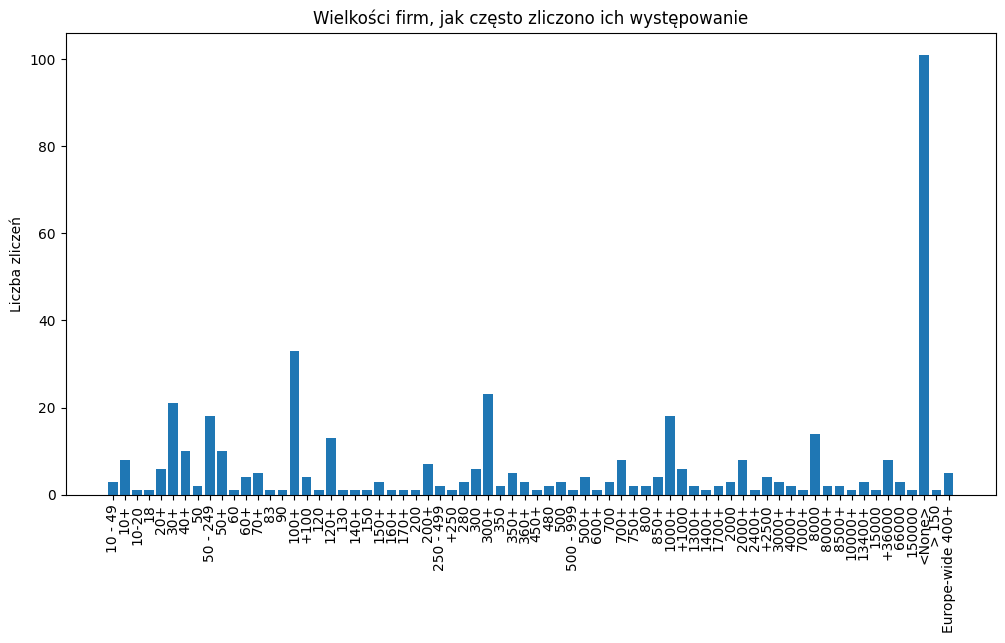

In [18]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# Funkcja pomocnicza do konwersji tekstu na wartości liczbowe, gdzie to możliwe
def atoi(text):
    return int(text) if text.isdigit() else text

# Funkcja do sortowania tekstów zawierających liczby w sposób naturalny
def natural_keys(text):
    # Usunięcie spacji między cyframi
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)
    # Przeniesienie znaku "+" na koniec, jeśli jest na początku
    text = re.sub(r'^\+(\d+)', r'\1+', text)
    # Sortowanie naturalne
    return [atoi(c) for c in re.split(r'(\d+)', text)]

def string_only_size_ctr(df):
    counter = Counter()
    
    for loc in df['company_size']:
        if isinstance(loc, str):  # Tylko jeśli wartość to łańcuch znaków
            counter[loc] += 1

    # Sortuj dane według klucza (wielkości firm), z uwzględnieniem zmodyfikowanych reguł
    sorted_data = dict(sorted(counter.items(), key=lambda x: natural_keys(x[0])))

    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba zliczeń')
    plt.title('Wielkości firm, jak często zliczono ich występowanie')
    plt.show()

# Wywołanie zmodyfikowanej funkcji
string_only_size_ctr(df)



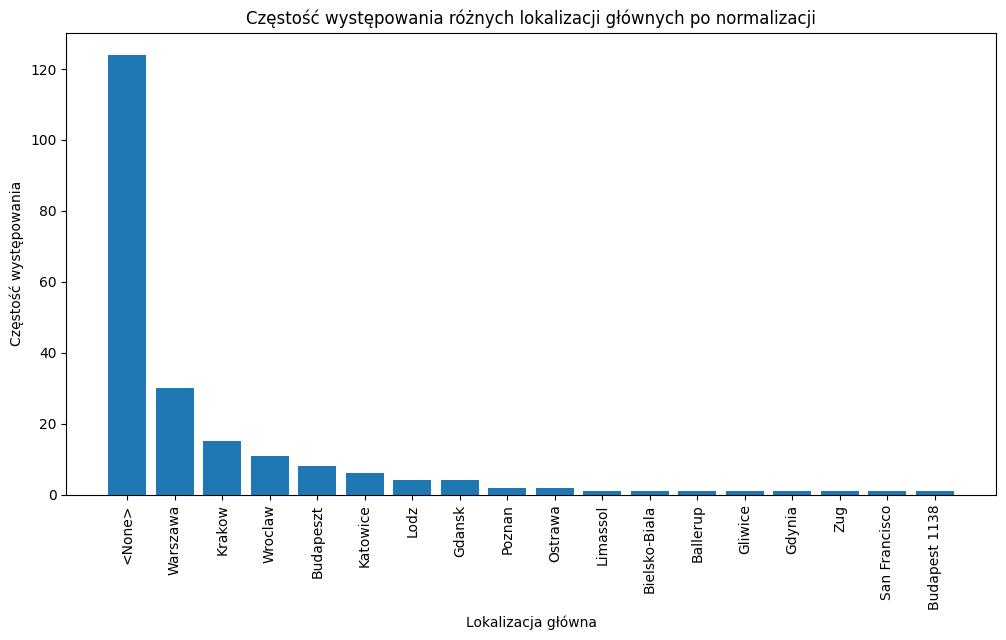

In [19]:
import pandas as pd
from collections import Counter
import unidecode
import matplotlib.pyplot as plt
import re
import requests

# Funkcje pomocnicze z drugiego kodu
def format_location(loc):
    loc = re.sub(r'\s*-\s*', '-', loc)
    return unidecode.unidecode(loc).title()

def get_polish_name(city_name):
    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbsearchentities",
        "language": "en",
        "format": "json",
        "search": city_name
    }
    response = requests.get(url, params=params)
    results = response.json().get('search')

    if not results:
        return None

    city_id = results[0].get('id')
    if not city_id:
        return None

    url = "https://www.wikidata.org/w/api.php"
    params = {
        "action": "wbgetentities",
        "ids": city_id,
        "format": "json",
        "props": "labels",
        "languages": "pl"
    }
    response = requests.get(url, params=params)
    data = response.json()

    polish_name = data['entities'][city_id]['labels'].get('pl')
    if polish_name:
        return polish_name.get('value')
    else:
        return None

def process_locations(counter):
    processed_counter = Counter()
    for loc, count in counter.items():
        if loc.lower() in ["remote", "hybrid"]:
            processed_counter[loc] += count
            continue

        polish_name = get_polish_name(loc)
        if polish_name:
            formatted_polish_name = format_location(polish_name)
            processed_counter[formatted_polish_name] += count
        else:
            formatted_loc = format_location(loc)
            processed_counter[formatted_loc] += count

    return processed_counter

# Modyfikacja pierwszego kodu
# Załóżmy, że df to DataFrame z Twoimi danymi
first_occurrences = df.drop_duplicates(subset='company')
location_counts = first_occurrences['company_head_office_place'].value_counts()

# Przetworzenie danych
counter = Counter(location_counts.to_dict())
processed_counter = process_locations(counter)

# Sortowanie i tworzenie wykresu
sorted_data = dict(sorted(processed_counter.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(sorted_data.keys(), sorted_data.values())
plt.xticks(rotation=90)
plt.ylabel('Częstość występowania')
plt.xlabel('Lokalizacja główna')
plt.title('Częstość występowania różnych lokalizacji głównych po normalizacji')
plt.show()


In [20]:
import pandas as pd
from datetime import timedelta
import re

def analyze_when_published(row):
    if "This offer expires" in row['when_published_relatively']:
        # Szukaj dwucyfrowej liczby
        match = re.search(r'\b\d{2}\b', row['when_published_relatively'])
        if not match:
            # Jeśli nie znaleziono dwucyfrowej liczby, szukaj jednocyfrowej
            match = re.search(r'\b\d\b', row['when_published_relatively'])
        if match:
            row['date_of_issueing_no'] = str(30 - int(match.group()))
        else:
            row['date_of_issueing_no'] = 'UnknownError'
    elif not row['when_published_relatively'] or row['when_published_relatively'] == "UnknownError":
        row['date_of_issueing_no'] = 'UnknownError'
    elif 'today' in row['when_published_relatively']:
        row['date_of_issueing_no'] = '0'
    else:
        digits = max(''.join(filter(str.isdigit, word)) for word in row['when_published_relatively'].split())
        if not digits:
            row['date_of_issueing_no'] = 'UnknownError'
        else:
            row['date_of_issueing_no'] = digits
    return row

df = df.apply(analyze_when_published, axis=1)

def calculate_date_of_issueing(row):
    if row['date_of_issueing_no'] == 'UnknownError':
        return 'UnknownError'
    else:
        date_result = pd.to_datetime(row['date_of_scrapping']) - timedelta(days=int(row['date_of_issueing_no']))
        return date_result.normalize().strftime('%Y-%m-%d')  # Tutaj konwertujemy datę na ciąg znaków w formacie yyyy-mm-dd


df['date_of_issueing'] = df.apply(calculate_date_of_issueing, axis=1)

result_df = df[['id', 'date_of_scrapping', 'when_published_relatively', 'date_of_issueing', 'date_of_issueing_no']]
pd.set_option('display.max_rows', 30)
result_df


,id,date_of_scrapping,when_published_relatively,date_of_issueing,date_of_issueing_no
0,1,2023-11-21,Oferta opublikowana dzisiaj,UnknownError,UnknownError
1,2,2023-11-21,today,2023-11-21,0
2,3,2023-11-21,This offer expires in 1 day,2023-10-23,29
3,4,2023-11-21,This offer expires in 1 day,2023-10-23,29
4,5,2023-11-21,5 days ago,2023-11-16,5
...,...,...,...,...,...
423,424,2023-11-21,1 day ago,2023-11-20,1
424,425,2023-11-21,1 day ago,2023-11-20,1
425,426,2023-11-21,1 day ago,2023-11-20,1
426,427,2023-11-21,today,2023-11-21,0


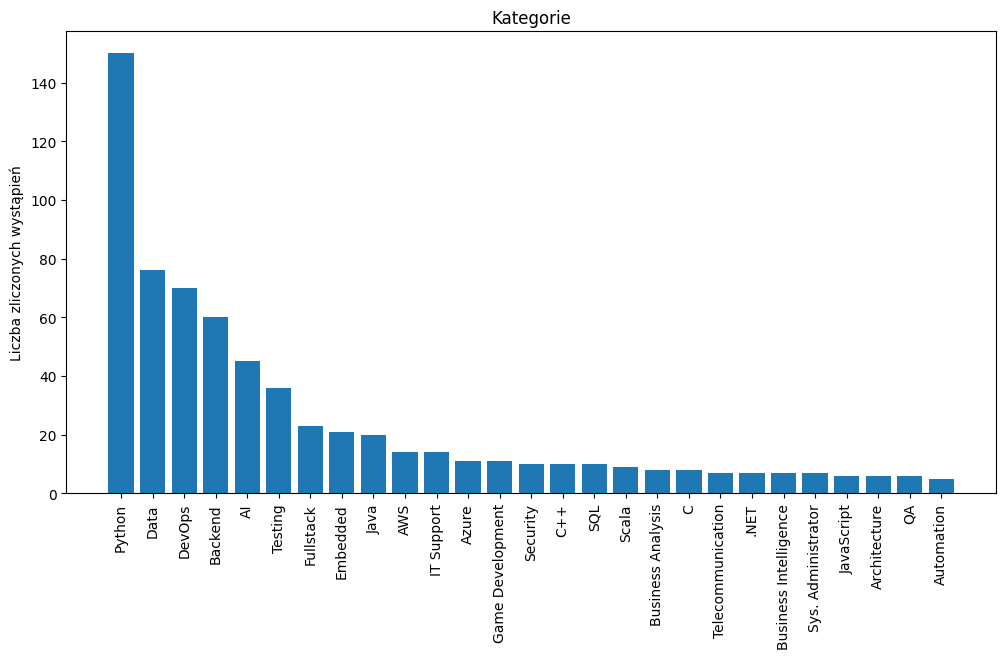

In [25]:

    def categories_ctr(df):
        counter = Counter()
        
        for loc in df['categories']:
            for sub_loc in loc.split(", "):
                counter[sub_loc] += 1

        # Filtruj tagi, które wystąpiły mniej niż 5 razy
        filtered_data = {k: v for k, v in counter.items() if v >= 5}

        # Sortuj dane w malejącej kolejności
        sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
                    
        # Tworzenie wykresu
        plt.figure(figsize=(12, 6))
        plt.bar(sorted_data.keys(), sorted_data.values())
        plt.xticks(rotation=90)
        plt.ylabel('Liczba zliczonych wystąpień')
        plt.title('Kategorie')
        plt.show()

categories_ctr(df)

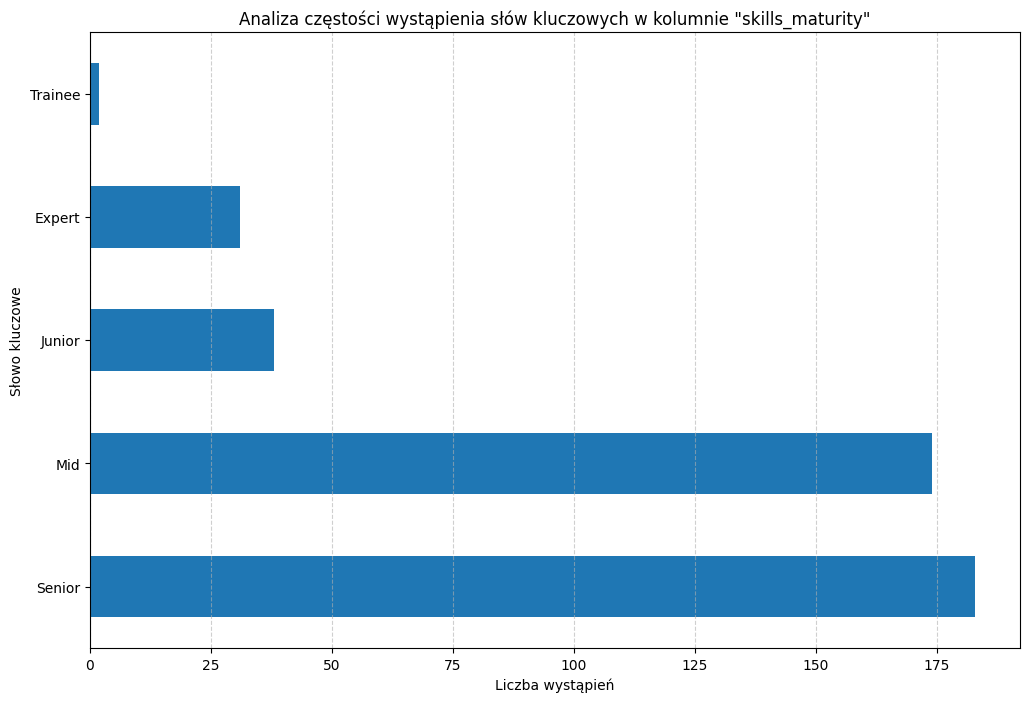

In [22]:
import matplotlib.pyplot as plt

def analyze_keyword_frequency(dataframe, column_name="skills_maturity"):
    # Sprawdź, czy kolumna istnieje w ramce danych
    if column_name not in dataframe.columns:
        print(f'Kolumna "{column_name}" nie istnieje w ramce danych.')
        return

    # Zliczenie częstości wystąpienia słów kluczowych
    keyword_counts = dataframe[column_name].value_counts()

    # Tworzenie wizualizacji
    plt.figure(figsize=(12, 8))
    keyword_counts.plot(kind='barh')
    plt.ylabel('Słowo kluczowe')
    plt.xlabel('Liczba wystąpień')
    plt.title(f'Analiza częstości wystąpienia słów kluczowych w kolumnie "{column_name}"')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

# Przykład użycia
analyze_keyword_frequency(df, 'skills_maturity')



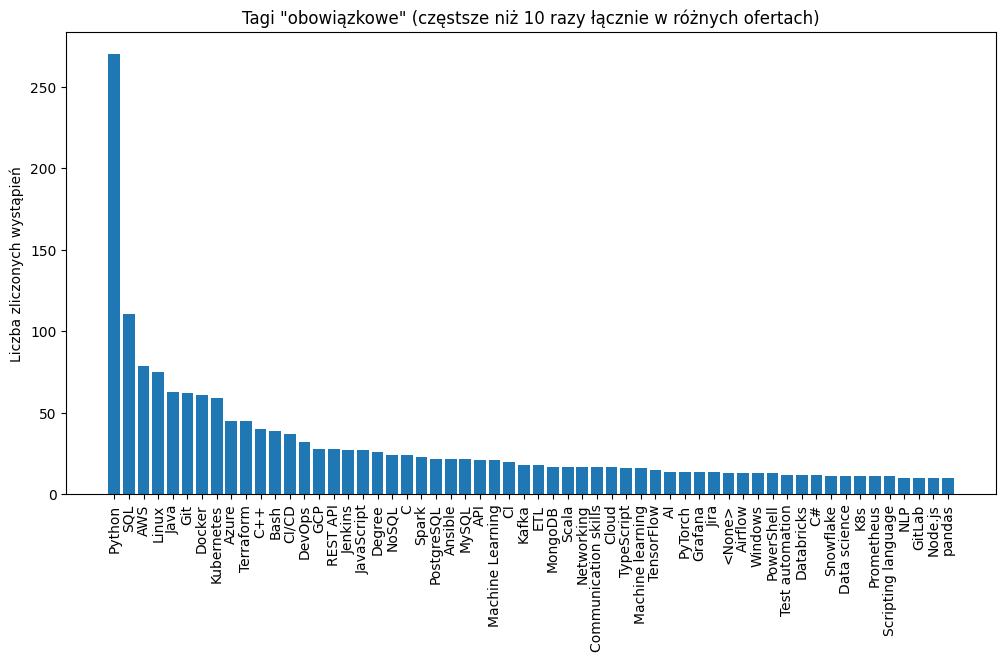

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

def tags_mandatory_ctr(df):
    counter = Counter()
    
    for loc in df['tags_mandatory']:
        for sub_loc in loc.split(", "):
            counter[sub_loc] += 1

    # Filtruj tagi, które wystąpiły mniej niż 10 razy
    filtered_data = {k: v for k, v in counter.items() if v >= 10}

    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
                
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba zliczonych wystąpień')
    plt.title('Tagi "obowiązkowe" (częstsze niż 10 razy łącznie w różnych ofertach)')
    plt.show()

# Przykład użycia
tags_mandatory_ctr(df)


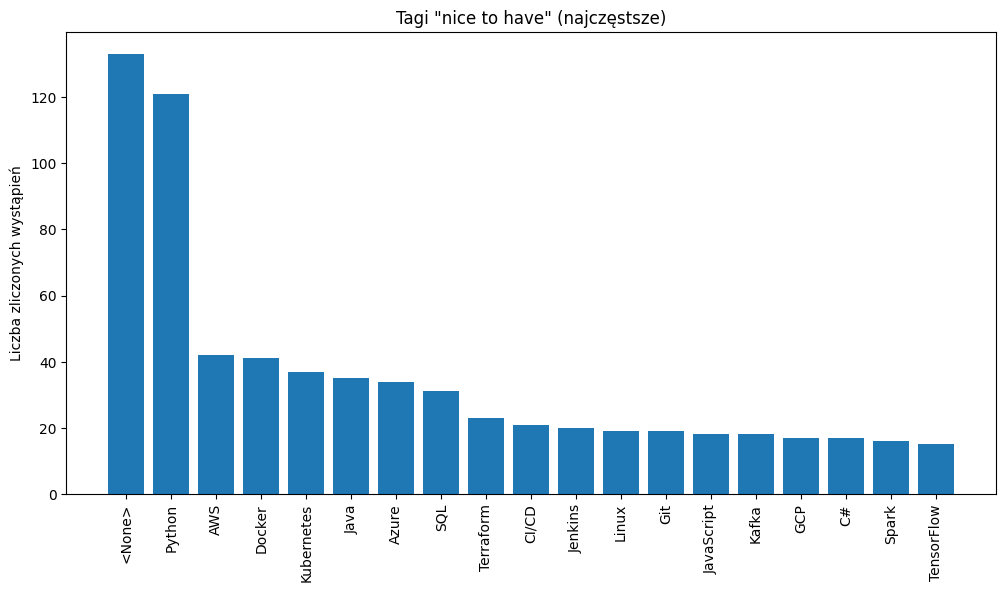

In [24]:
from collections import Counter
import matplotlib.pyplot as plt

def tags_nice_to_have_ctr(df):
    counter = Counter()
    
    for loc in df['tags_nice_to_have']:
        for sub_loc in loc.split(", "):
            counter[sub_loc] += 1

    # Filtruj tagi, które wystąpiły mniej niż 3 razy
    filtered_data = {k: v for k, v in counter.items() if v >= 15}

    # Sortuj dane w malejącej kolejności
    sorted_data = dict(sorted(filtered_data.items(), key=lambda x: x[1], reverse=True))
                
    # Tworzenie wykresu
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_data.keys(), sorted_data.values())
    plt.xticks(rotation=90)
    plt.ylabel('Liczba zliczonych wystąpień')
    plt.title('Tagi "nice to have" (najczęstsze)')
    plt.show()

# Przykład użycia
tags_nice_to_have_ctr(df)
